<a href="https://colab.research.google.com/github/NeonLabs146/PyTorch_081/blob/main/00_PyTorch_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('Hello I''\'m so excited')
print("Hello I'm so excited")

Hello I'm so excited
Hello I'm so excited


Pytorch is a library for Python programs that facilitates building deep learning projects. We like Python because is easy to read and understand. PyTorch emphasizes flexibility and allows deep learning models to be expressed in idiomatic Python.

Why PyTorch?
- NumPy-like arrays on GPU’s
- Dynamic computational graphs
- It’s Pythonic!

Tensors


*   PyTorch tensors are similar to NumPy ndarrays with the option to operate on GPU.



In [ ]:
!nvidia-smi

Thu Jan 19 12:44:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)

1.13.1+cu116


**Creating tensors**

In [ ]:
# Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
scalar.ndim

0

In [ ]:
# Get the Python number within a tensor (only works with one-element tensors)
scalar.item()

7

In [ ]:
# Vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [ ]:
vector.ndim


1

In [ ]:
#Matrix
M=torch.tensor([[7,8],[9,6]])
M

tensor([[7, 8],
        [9, 6]])

In [ ]:
M.ndim

2

In [ ]:
ones=np.ones((2,3))
ones

array([[1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
ones=torch.ones(size=(2,3))
ones

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
import random
x=random.randint(0,100)
print(x)

82


In [ ]:
array=np.array([1,2,3,4])
print(array+10)
y=np.multiply(array,2)
print(y)


[11 12 13 14]
[2 4 6 8]


In [ ]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
y=tensor + 10
print(y)
x=torch.multiply(tensor,2)
print(x)

tensor([11, 12, 13])
tensor([2, 4, 6])


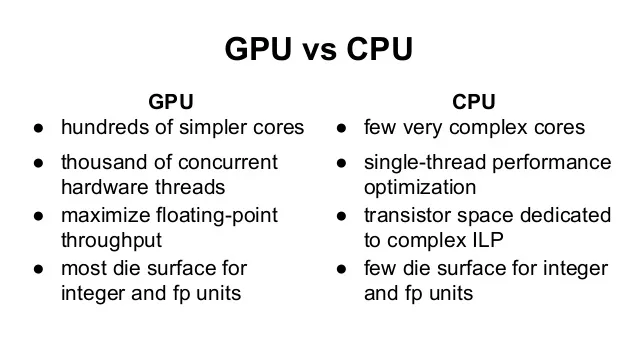

**Switching between CPU and GPU**

In [ ]:
import torch
cpu=torch.device("cpu")
gpu=torch.device("cuda:0") # GPU 0
# Create tensor with CPU
x=torch.ones(3,3, device=cpu)
print("CPU:",x.device)
x=torch.ones(3,3, device=gpu)
print("GPU:",x.device)
x=torch.ones(3,3).cuda(0)
print("CPU to GPU:",x.device)
x=torch.ones(3,3, device=gpu).cpu()
print("GPU to CPU:",x.device)

CPU: cpu
GPU: cuda:0
CPU to GPU: cuda:0
GPU to CPU: cpu


Compare time between CPU and GPU

In [ ]:
#Time in CPU
import time
x=torch.rand(1000,1000)
y=torch.rand(1000,1000)
t = time.time()
z=x@y
t = time.time()-t
print(t)

0.027329683303833008


In [ ]:
#Time in GPU
xc=x.cuda(0)
yc=y.cuda(0)
t = time.time()
z=xc@yc
t = time.time()-t
print(t)

0.0003185272216796875


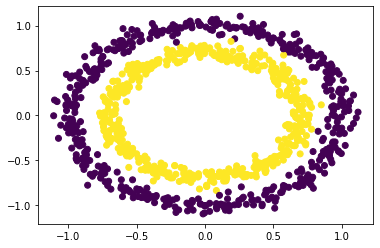

In [ ]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
dat, lbs = datasets.make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=True, factor=0.7)

plt.scatter(dat[:,0], dat[:,1], c=lbs)

In [ ]:
import torch
import numpy as np

# load the dataset
dataset = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/PyTorch/pima-indians-diabetes.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [ ]:
# split the dataset into training and test sets
Xtrain = X[:700]
ytrain = y[:700]
Xtest = X[700:]
ytest = y[700:]


In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
model = nn.Sequential(
nn.Linear(8, 12),
nn.ReLU(),
nn.Linear(12, 8),
nn.ReLU(),
nn.Linear(8, 1),
nn.Sigmoid()
)
print(model)
# loss function and optimizer
loss_fn = nn.BCELoss() # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)


Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


In [ ]:
n_epochs = 50 # number of epochs to run
batch_size = 10 # size of each batch
batches_per_epoch = len(Xtrain) // batch_size
for epoch in range(n_epochs):
  for i in range(batches_per_epoch):
    start = i * batch_size
# take a batch
    Xbatch = Xtrain[start:start+batch_size]
    ybatch = ytrain[start:start+batch_size]
    # forward pass
    y_pred = model(Xbatch)
    loss = loss_fn(y_pred, ybatch)
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    # update weights
    optimizer.step()

In [ ]:
import torch

x= torch.arange(12,dtype=torch.float32)
print(x)


tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])


In [ ]:
#x.numel()
len(x)

12

In [ ]:
x.shape

torch.Size([12])

In [ ]:
X=x.reshape(3,4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
Y=x.reshape(-1,4)
Y

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
torch.zeros(2,3,4)


tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
torch.ones(2,3,4)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [ ]:
torch.randn(3,4)

tensor([[-0.3892,  0.0561, -0.2672, -1.6679],
        [-0.2385, -0.5411,  0.8716, -1.3972],
        [-0.5005,  0.8302,  0.5553,  0.3536]])

In [ ]:
torch.tensor([[1,2,4,3],[2,1,4,5],[5,4,3,2]])

tensor([[1, 2, 4, 3],
        [2, 1, 4, 5],
        [5, 4, 3, 2]])

In [ ]:
x[-1]

tensor(11.)

In [ ]:
X[-1]

tensor([ 8.,  9., 10., 11.])

In [ ]:
X[1:3]

tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
X[2,2]

tensor(10.)

In [ ]:
X[:2,:]=15
print(X)

tensor([[15., 15., 15., 15.],
        [15., 15., 15., 15.],
        [ 8.,  9., 10., 11.]])


###**Oprations**

In [ ]:
torch.exp(X)

tensor([[3.2690e+06, 3.2690e+06, 3.2690e+06, 3.2690e+06],
        [3.2690e+06, 3.2690e+06, 3.2690e+06, 3.2690e+06],
        [2.9810e+03, 8.1031e+03, 2.2026e+04, 5.9874e+04]])

##**Data Preprocessing**
Reading the dataset


In [ ]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
3,NA,127500
2,NA,106000
4,Slate,178100
NA,Slate,140000''')

In [ ]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       3.0      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN    Slate  140000


Data preparation

In [ ]:
inputs, targets = data.iloc[:,0:2], data.iloc[:,2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0               0             1
1       2.0               0             1
2       4.0               1             0
3       NaN               1             0


For missing numerical values, one common heuristic is to replace the NaN entries with the mean value of the corresponding column.

In [ ]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0               0             1
1       2.0               0             1
2       4.0               1             0
3       3.0               1             0


###**Conversion to the Tensor Format**

In [ ]:
import torch

X, y = torch.tensor(inputs.values), torch.tensor(targets.values)
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 1., 0.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

**Exersise**

In [ ]:
import os
import torch
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PyTorch/abalone/abalone.data',delimiter=',')
print(data)

      M  0.455  0.365  0.095   0.514  0.2245   0.101    0.15  15
0     M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
1     F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
2     M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
3     I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
4     I  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.1200   8
...  ..    ...    ...    ...     ...     ...     ...     ...  ..
4171  F  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4172  M  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4173  M  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4174  F  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4175  M  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

[4176 rows x 9 columns]


In [ ]:
inputs, targets = data.iloc[:,0:2], data.iloc[:,2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

      0.455  M_F  M_I  M_M  M_nan
0     0.350    0    0    1      0
1     0.530    1    0    0      0
2     0.440    0    0    1      0
3     0.330    0    1    0      0
4     0.425    0    1    0      0
...     ...  ...  ...  ...    ...
4171  0.565    1    0    0      0
4172  0.590    0    0    1      0
4173  0.600    0    0    1      0
4174  0.625    1    0    0      0
4175  0.710    0    0    1      0

[4176 rows x 5 columns]


In [ ]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

      0.455  M_F  M_I  M_M  M_nan
0     0.350    0    0    1      0
1     0.530    1    0    0      0
2     0.440    0    0    1      0
3     0.330    0    1    0      0
4     0.425    0    1    0      0
...     ...  ...  ...  ...    ...
4171  0.565    1    0    0      0
4172  0.590    0    0    1      0
4173  0.600    0    0    1      0
4174  0.625    1    0    0      0
4175  0.710    0    0    1      0

[4176 rows x 5 columns]


In [ ]:
import torch

X, y = torch.tensor(inputs.values), torch.tensor(targets.values)
X, y

(tensor([[0.3500, 0.0000, 0.0000, 1.0000, 0.0000],
         [0.5300, 1.0000, 0.0000, 0.0000, 0.0000],
         [0.4400, 0.0000, 0.0000, 1.0000, 0.0000],
         ...,
         [0.6000, 0.0000, 0.0000, 1.0000, 0.0000],
         [0.6250, 1.0000, 0.0000, 0.0000, 0.0000],
         [0.7100, 0.0000, 0.0000, 1.0000, 0.0000]], dtype=torch.float64),
 tensor([0.2650, 0.4200, 0.3650,  ..., 0.4750, 0.4850, 0.5550],
        dtype=torch.float64))

#**Linear Algebra**

Formally manuplating number once a time - Scalar

For example, the temperature in Kathmandu is a balmy 76
 degrees Fahrenheit. If you wanted to convert the temperature to Celsius you would evaluate the expression c=5/9(f-32), setting
 f to 76. In this equation, the values 5,9, and 76 are scalars. The variables f and c represent unknown scalars.
 Scalars are represented uisng small letters.

In [ ]:
import torch

x = torch.tensor(3.0)
y = torch.tensor(5.0)
x+y, x*y, y/x


(tensor(8.), tensor(15.), tensor(1.6667))

#**Vector**


Fixed length array of scalars-vectors

We denote vectors by bold lowercase letters, (e.g.,**x**, **y**, and **z**).

In [ ]:
x = torch.arange(5)
x

tensor([0, 1, 2, 3, 4])

In [ ]:
y=list(range(5))
y

[0, 1, 2, 3, 4]